### **Introducción**:

El hundimiento del Titanic en 1912 sigue siendo una de las tragedias marítimas más estudiadas. En este Jupyter Notebook, analizaremos el conjunto de datos del Titanic para comprender la relación entre la clase social, el género y la tasa de supervivencia.

Objetivos

-  Exploración y visualización de datos: Examinar las características de los pasajeros y crear visualizaciones para identificar patrones.
- Análisis estadístico: Analizar la relación entre la clase social, el género y la supervivencia.
- Modelado de Machine Learning: Desarrollar y entrenar modelos para predecir la supervivencia.
- Evaluación de modelos: Evaluar el rendimiento de los modelos y analizar los resultados.



### **1)Preparación de los datos**

**Importación de librerias:**


In [433]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

**Lectura e importación del set de datos**

In [434]:
test = pd.read_csv('Data_Titanic/test.csv')
train = pd.read_csv('Data_Titanic/train.csv')
survided = pd.read_csv('Data_Titanic/gender_submission.csv')

**Inspección del dataset:**

In [435]:
# Inspección del dataframe Test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [436]:
# Inspección del dataframe Train
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [437]:
# Inspección del dataframe Survived
survided.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


**Data Set Size**:

In [438]:
print(f"""Data set / Row, Col 
Test:     {test.shape}
Train:    {train.shape}
Survived: {survided.shape}
""")

Data set / Row, Col 
Test:     (418, 11)
Train:    (891, 12)
Survived: (418, 2)



In [439]:
print(f"""Cantidad de registros en Test:\n{test.count()}\n""")

Cantidad de registros en Test:
PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64



In [440]:
print(f"""Cantidad de registros en Train:\n{train.count()}""")

Cantidad de registros en Train:
PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64


In [441]:
print(f"""Cantidad de registros en Survived:\n{survided.count()}\n""")

Cantidad de registros en Survived:
PassengerId    418
Survived       418
dtype: int64



**Tipo de datos:**

In [442]:
# Test dtypes
print("Tipos de datos en dataframe test:")
test.dtypes

Tipos de datos en dataframe test:


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [443]:
# Train dtypes
print("Tipos de datos en dataframe train:")
train.dtypes

Tipos de datos en dataframe train:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [444]:
# Survived dtypes
print("Tipos de datos en dataframe survided:")
survided.dtypes

Tipos de datos en dataframe survided:


PassengerId    int64
Survived       int64
dtype: object

**Observación:** 
La tabla contiene una combinación de variables numéricas y categóricas. 
- Las variables numéricas incluyen **PassengerId, Age, SibSp, Parch, Fare.**
- Las variables categóricas incluyen **Survived, Pclass, Sex, Embarked y Cabin.**    
- La variable **Name** es una cadena de texto que contiene información textual sobre el nombre del pasajero. 

### **2) Valores Nulos**


#### **Test N/A values:**

In [445]:
# Test N/A
print('Valores nulos en dataset Test:\n',test.isna().sum())

Valores nulos en dataset Test:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**Observacion**:         
- El conjunto de datos de prueba presenta  un total de **86** valores faltantes en la variable Age.  
- El conjunto de datos de prueba presenta  un total de **1** valores faltantes en la variable Fare.  
- El conjunto de datos de prueba presenta  un total de **327** valores faltantes en la variable Cabin.      

Para el conjunto de datos Test:
- Reemplazaremos los valores nulos de la columna Age con el valor de su promedio.
- Reemplazaremos los valores nulos de la columna Fare con el valor de su promedio.
- Reemplazaremos los valores nulos de la columna Cabin con "N/A".


In [446]:
# Imputación  de valores Nulos en Columna Age
age_test_mean = test['Age'].mean()
test['Age'] = test['Age'].fillna(age_test_mean)

# Imputación de valores Nulos en Columna Fare
fare_test_mean = test['Fare'].mean()
test['Fare'] = test['Fare'].fillna(fare_test_mean)

# Imputación de valores Nulos en Columna Cabin
test['Cabin'] = test['Cabin'].fillna("N/A")

# Test N/A
print('Valores nulos en dataset Test:\n',test.isna().sum())

Valores nulos en dataset Test:
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#### **Train N/A values:**

In [447]:
# Train N/A
print('Valores nulos en dataset Train:\n',train.isna().sum())

Valores nulos en dataset Train:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Observacion**:
- El conjunto de datos de prueba presenta  un total de **177** valores faltantes en la variable Age.  
- El conjunto de datos de prueba presenta  un total de **687** valores faltantes en la variable Cabin. 
- El conjunto de datos de prueba presenta  un total de **2** valores faltantes en la variable Embarked.   
  
Para el conjunto de datos Train:  
- Reemplazaremos los valores nulos de la columna Age con el valor de su promedio.
- Reemplazaremos los valores nulos de la columna Cabin  con "N/A". 
- Reemplazaremos los valores nulos de la columna Cabin  su moda. 

In [448]:
# Imputación  de valores Nulos en Columna Age
age_train_mean = train['Age'].mean()
train['Age'] = train['Age'].fillna(age_train_mean)

# Imputación de valores Nulos en Columna Cabin
train['Cabin'] = train['Cabin'].fillna("N/A")

# Imputación de valores Nulos en Columna Embarked
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Test N/A
print('Valores nulos en dataset Train:\n',train.isna().sum())

Valores nulos en dataset Train:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#### **Survived N/A values:**

In [449]:
# Survived N/A values 
print('Valores nulos en dataset Survived:\n',survided.isna().sum())

Valores nulos en dataset Survived:
 PassengerId    0
Survived       0
dtype: int64


**Observacion**: Para el conjunto de datos Survived:        
- No presenta Valores Nulos

### **3) Visualización de datos**

#### 1.Distribución de la edad de los pasajeros

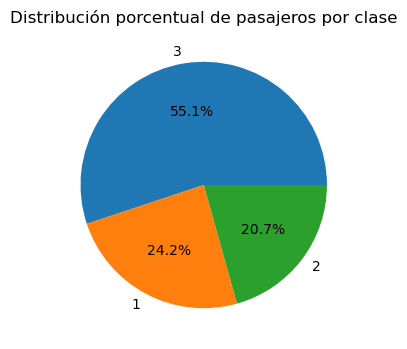

In [452]:
# Extracción de los datos de clase de pasajero
clases_pasajero = train["Pclass"]
numero_pasajeros_por_clase = clases_pasajero.value_counts()

# Cálculo de los porcentajes
porcentajes_pasajeros_por_clase = numero_pasajeros_por_clase / len(train) * 100

# Creación del gráfico de sectores
plt.figure(figsize=(8,4))
plt.pie(porcentajes_pasajeros_por_clase, labels=numero_pasajeros_por_clase.index, autopct="%1.1f%%")
plt.title("Distribución porcentual de pasajeros por clase")
plt.show()



Total de pasajeros registrados: 891

Distribución por clase:
- Primera clase: 216 pasajeros (24,2% del total)
- Segunda clase: 184 pasajeros (20,7% del total)
- Tercera clase: 491 pasajeros (55,1% del total) (Moda)

#### 2. Distribución de pasajeros por clase y género

<Figure size 800x400 with 0 Axes>

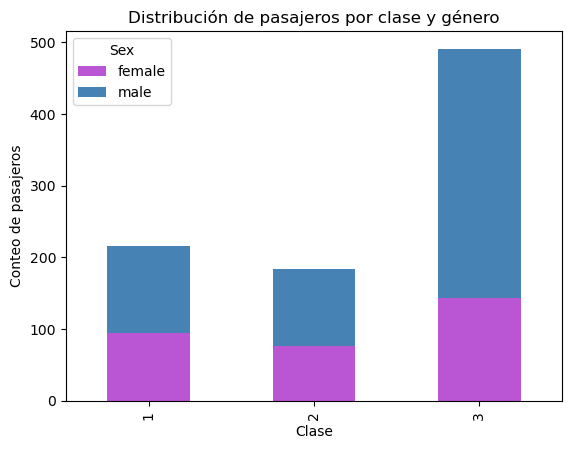

In [453]:
#  Extracción de los datos de clase de pasajero y sexo 
df_grouped = train.groupby(['Pclass', 'Sex']).size().unstack()

# Creación del gráfico de barras 
plt.figure(figsize=(8,4))
df_grouped.plot(kind='bar', stacked=True, color=['mediumorchid', 'steelblue'])
plt.xlabel('Clase')
plt.ylabel('Conteo de pasajeros')
plt.title('Distribución de pasajeros por clase y género')
plt.show()

**Distribucion por clase y genero:**

Primera clase: 216 pasajeros (24,2% del total)  
- Mujeres: 94 pasajeros (43,5% de primera clase)  
- Hombres: 122 pasajeros (56,5% de primera clase) 

Segunda clase: 184 pasajeros (20,7% del total)
- Mujeres: 76 pasajeros (41,3% de segunda clase)
- Hombres: 108 pasajeros (58,7% de segunda clase)

Tercera clase: 491 pasajeros (55,1% del total)
- Mujeres: 144 pasajeros (29,3% de tercera clase)
- Hombres: 347  pasajeros (70,7% de tercera clase)

**Análisis por género:**

- Mujeres: 314 pasajeros (35,4% del total)
- Hombres: 573 pasajeros (64,6% del total)

**Conclusiones:**   
En general, se observa una desigualdad en la distribución de pasajeros por género, con una mayor proporción de hombres en todas las clases. Sin embargo, la primera clase tiene la mayor proporción de mujeres entre las clases, mientras que la tercera clase tiene la menor proporción. La segunda clase presenta una distribución más equilibrada por género.    

#### 3. Tasa de supervivencia

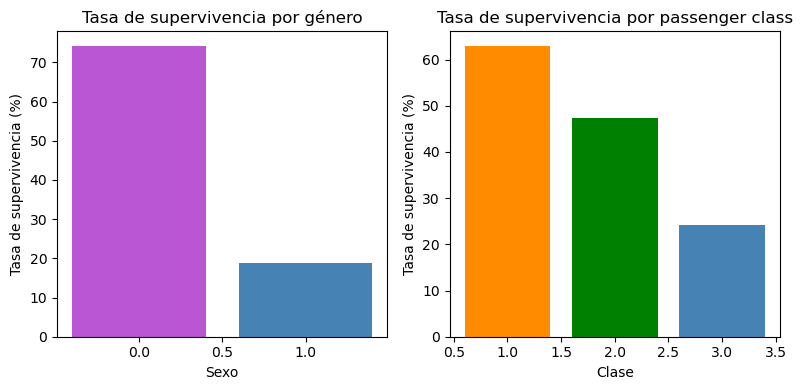

In [461]:
# Cálculo de la tasa de supervivencia por género
tasa_supervivencia_genero = train.groupby("Sex")["Survived"].mean() * 100

# Cálculo de la tasa de supervivencia por tipo de pasajero
tasa_supervivencia_tipo_pasajero = train.groupby("Pclass")["Survived"].mean() * 100

# Creación de la figura y los subgráficos (fig, ax)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

# Gráfico de barras para supervivencia por género (ax1)
ax1.bar(tasa_supervivencia_genero.index, tasa_supervivencia_genero.values, color=["mediumorchid", "steelblue"])
ax1.set_title("Tasa de supervivencia por género")
ax1.set_xlabel("Sexo")
ax1.set_ylabel("Tasa de supervivencia (%)")

# Gráfico de barras para supervivencia por tipo de pasajero (ax2)
ax2.bar(tasa_supervivencia_tipo_pasajero.index, tasa_supervivencia_tipo_pasajero.values, color=["darkorange", "green", "steelblue"])
ax2.set_title("Tasa de supervivencia por passenger class")
ax2.set_xlabel("Clase")
ax2.set_ylabel("Tasa de supervivencia (%)")

# Ajustar el diseño de la figura
plt.tight_layout()
plt.show()

**Análisis del gráfico 1:**

El gráfico 1 muestra que la tasa de supervivencia de las mujeres fue significativamente mayor que la de los hombres. De hecho, la tasa de supervivencia de las mujeres fue superior al 70%, mientras que la de los hombres fue solo del 19,2%. Esto significa que las mujeres tenían casi tres a cuatro veces más probabilidades de sobrevivir al hundimiento del Titanic que los hombres.

**Análisis del gráfico 2:**

El gráfico 2 muestra que la tasa de supervivencia de los pasajeros de primera clase fue la más alta, seguida de la de los pasajeros de segunda clase y la de los pasajeros de tercera clase. De hecho, la tasa de supervivencia de los pasajeros de primera clase fue del 62,2%, la de los pasajeros de segunda clase fue del 49,6% y la de los pasajeros de tercera clase fue solo del 24,3%. Esto significa que los pasajeros de primera clase tenían casi tres veces más probabilidades de sobrevivir al hundimiento del Titanic que los pasajeros de tercera clase.

**Conclusiones**

El análisis de la tasa de supervivencia en el Titanic muestra que la tragedia no fue aleatoria. Las mujeres, los niños, los pasajeros de primera clase y las personas que sabían nadar tenían más probabilidades de sobrevivir.

### **4)Machine Learning:**

#### **Preprocesar los datos**

In [455]:
# Codificar variables categóricas
label_encoder = LabelEncoder()
train['Sex'] = label_encoder.fit_transform(train['Sex'])
test['Sex'] = label_encoder.transform(test['Sex'])

train['Embarked'] = label_encoder.fit_transform(train['Embarked'])
test['Embarked'] = label_encoder.transform(test['Embarked'])

# Seleccionar características y etiquetas
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train[features]
y = train['Survived']
X_test = test[features]

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Dividir el conjunto de entrenamiento para validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Aprendizaje Supervisado:**

In [456]:
# 1. Regresión Logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_val)
log_reg_acc = accuracy_score(y_val, log_reg_pred)

# 2. Árbol de Decisión
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_clf_pred = tree_clf.predict(X_val)
tree_clf_acc = accuracy_score(y_val, tree_clf_pred)


#### **Aprendizaje No Supervisado:**

In [457]:
# 1. KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
kmeans_pred = kmeans.predict(X_val)
kmeans_acc = accuracy_score(y_val, kmeans_pred)

# 2. Gaussian Mixture
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_train)
gmm_pred = gmm.predict(X_val)
gmm_acc = accuracy_score(y_val, gmm_pred)

c:\Users\dafko\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dafko\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\dafko\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


#### **Precisión de los modelos**

In [458]:
# Accuracy score  
print(f"""Resultado de la precisión de los modelos:
1. Regresión Logística  {log_reg_acc:.4f}
2. Árbol  de Decisión {tree_clf_acc:.4f}
3. KMeans {kmeans_acc:.4f}
4. Gaussian Mixture {gmm_acc:.4f}""")

Resultado de la precisión de los modelos:
1. Regresión Logística  0.8101
2. Árbol  de Decisión 0.8045
3. KMeans 0.6927
4. Gaussian Mixture 0.7039


**Observación**: El modelo de Regresión Logística es el que entrego el mejor resultado con una precisión del **81,01%**. 
Es por ello que utilizaremos este modelo para generar las predicciones. 

#### **Modelo Seleccionado**

In [459]:
# Entrenar el modelo de Regresión Logística con todos los datos de entrenamiento
log_reg.fit(X, y)

# Generar predicciones en el conjunto de prueba
test_predictions = log_reg.predict(X_test)

# Crear un DataFrame con los resultados
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_predictions
})

# Comparar las predicciones con las del archivo de género
accuracy = accuracy_score(survided['Survived'], test_predictions)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Print las primeras 10 predicciones
submission.head(10)

Precisión del modelo: 94.74%


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
